# Some analysis

✅ Total objects: 1840374
✅ Unique classes: 10


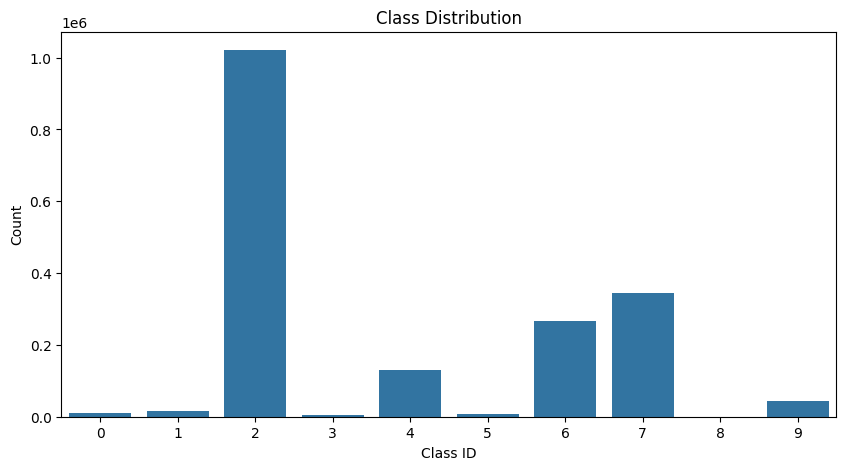

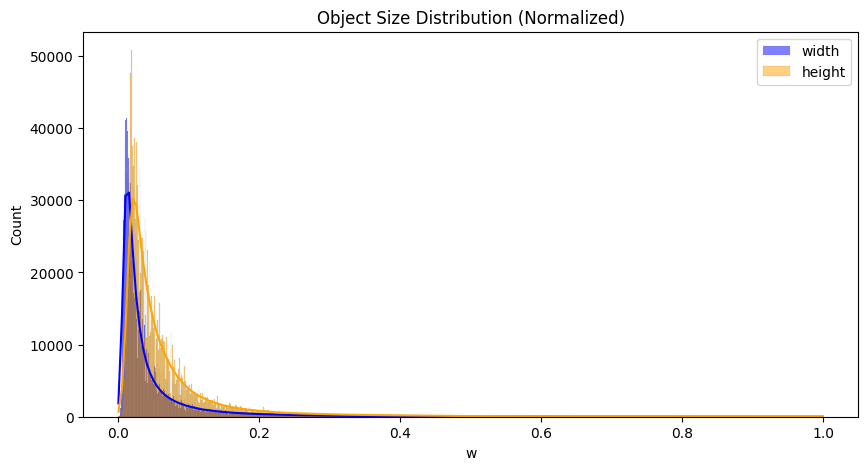

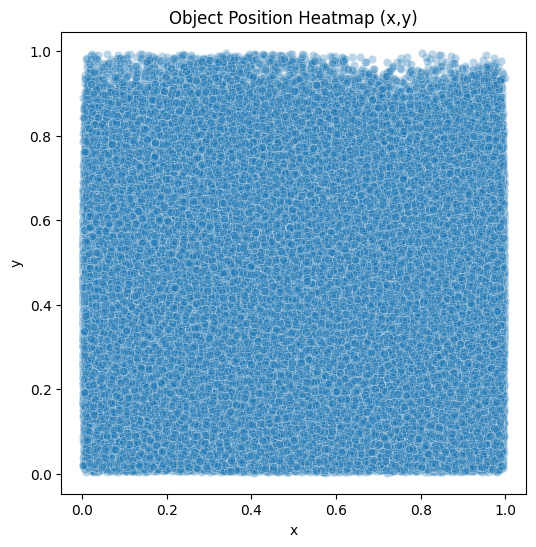

In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # paths
# images_dir = r"D:\roboflow\merged\images"
# labels_dir = r"D:\roboflow\merged\labels"
# data_yaml = r"D:\roboflow\data.yaml"    

# # get all label files
# label_files = [os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith(".txt")]

# all_data = []

# # loop through label files
# for label_file in label_files:
#     with open(label_file, "r") as f:
#         for line in f.readlines():
#             values = line.strip().split()
#             if len(values) == 5:
#                 cls, x, y, w, h = map(float, values)
#                 all_data.append({
#                     "file": os.path.basename(label_file),
#                     "class_id": int(cls),
#                     "x": x, "y": y, "w": w, "h": h
#                 })

# df = pd.DataFrame(all_data)
# print("✅ Total objects:", len(df))
# print("✅ Unique classes:", df['class_id'].nunique())

# # 📊 class distribution
# plt.figure(figsize=(10,5))
# sns.countplot(x="class_id", data=df)
# plt.title("Class Distribution")
# plt.xlabel("Class ID")
# plt.ylabel("Count")
# plt.show()

# # 📊 object width & height distribution
# plt.figure(figsize=(10,5))
# sns.histplot(df["w"], kde=True, label="width", color="blue")
# sns.histplot(df["h"], kde=True, label="height", color="orange")
# plt.title("Object Size Distribution (Normalized)")
# plt.legend()
# plt.show()

# # 📊 object position (x,y)
# plt.figure(figsize=(6,6))
# sns.scatterplot(x="x", y="y", data=df, alpha=0.3)
# plt.title("Object Position Heatmap (x,y)")
# plt.show()

In [ ]:
import os

labels_dir = r"D:\roboflow\merged\labels"

total_boxes = 0
for file in os.listdir(labels_dir):
    if file.endswith(".txt"):
        with open(os.path.join(labels_dir, file), "r") as f:
            lines = [line.strip() for line in f if line.strip()]
            total_boxes += len(lines)

print(f"📦 Total bounding boxes in dataset: {total_boxes}")

📦 Total bounding boxes in dataset: 1840374


In [ ]:
import os
from collections import Counter

class_counts = Counter()

for file in os.listdir(labels_dir):
    if file.endswith(".txt"):
        with open(os.path.join(labels_dir, file), "r") as f:
            lines = [line.strip() for line in f if line.strip()]
            for line in lines:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1

total_classes = len(class_counts)
total_boxes = sum(class_counts.values())
avg_boxes_per_class = total_boxes / total_classes

print(f"📦 Total bounding boxes: {total_boxes}")
print(f"🏷️ Total classes: {total_classes}")
print(f"📊 Average bounding boxes per class: {avg_boxes_per_class:.2f}")

📦 Total bounding boxes: 1840374
🏷️ Total classes: 10
📊 Average bounding boxes per class: 184037.40


In [ ]:
import os
from collections import defaultdict

labels_dir = r"D:\roboflow\merged\labels"

# use a defaultdict to collect sizes per class
class_sizes = defaultdict(list)

for file in os.listdir(labels_dir):
    if file.endswith(".txt"):
        with open(os.path.join(labels_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id = int(parts[0])
                    width = float(parts[3])
                    height = float(parts[4])
                    area = width * height  # YOLO coords are normalized (0–1)
                    class_sizes[class_id].append(area)

# calculate average size per class
avg_size_per_class = {
    cid: sum(areas) / len(areas) for cid, areas in class_sizes.items() if areas
}

# print average sizes
print("📏 Average Bounding Box Area per Class:")
for cid, avg_area in sorted(avg_size_per_class.items()):
    print(f"Class {cid}: {avg_area:.6f}")


📏 Average Bounding Box Area per Class:
Class 0: 0.006314
Class 1: 0.038163
Class 2: 0.010191
Class 3: 0.008202
Class 4: 0.003179
Class 5: 0.006665
Class 6: 0.000550
Class 7: 0.001305
Class 8: 0.042637
Class 9: 0.030057


C:\Users\Samer\AppData\Local\Temp\ipykernel_13648\3696150129.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(areas.keys()), y=list(areas.values()),


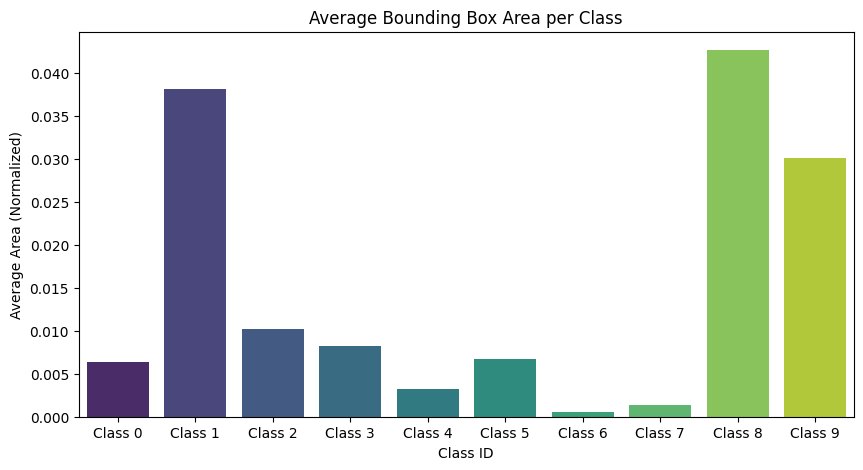

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

areas = {'Class 0': 0.006314,
'Class 1': 0.038163,
'Class 2': 0.010191,
'Class 3': 0.008202,
'Class 4': 0.003179,
'Class 5': 0.006665,
'Class 6': 0.000550,
'Class 7': 0.001305,
'Class 8': 0.042637,
'Class 9': 0.030057}

plt.figure(figsize=(10,5))
sns.barplot(x=list(areas.keys()), y=list(areas.values()),
            palette="viridis",
            order=sorted(areas.keys(), key=lambda x: int(x.split()[1])))
plt.title("Average Bounding Box Area per Class")
plt.xlabel("Class ID")
plt.ylabel("Average Area (Normalized)")
plt.show()

In [ ]:
import os
import numpy as np

labels_dir = r"D:\roboflow\merged\labels"
threshold = 0.8  # 10% margin around average

# Step 1: Collect all bounding box areas per class
areas_by_class = {}

for file in os.listdir(labels_dir):
    if file.endswith(".txt"):
        with open(os.path.join(labels_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id = int(parts[0])
                    w, h = float(parts[3]), float(parts[4])
                    area = w * h  # normalized area (0–1)
                    areas_by_class.setdefault(class_id, []).append(area)

# Step 2: Calculate average area for each class
avg_area = {cls: np.mean(areas) for cls, areas in areas_by_class.items()}

# Step 3: Count outliers relative to average ±10%
outlier_stats = {}
total_outliers = 0
total_boxes = 0

for class_id, areas in areas_by_class.items():
    avg = avg_area[class_id]
    lower = avg * (1 - threshold)
    upper = avg * (1 + threshold)

    outliers = [a for a in areas if a < lower or a > upper]
    outlier_count = len(outliers)
    total_count = len(areas)
    percentage = (outlier_count / total_count) * 100

    outlier_stats[class_id] = {
        "avg_area": avg,
        "total_boxes": total_count,
        "outliers": outlier_count,
        "percentage": percentage
    }

    total_outliers += outlier_count
    total_boxes += total_count

# Step 4: Print results
print("📊 Outlier Statistics per Class (±10% of average):")
for cid, stats in outlier_stats.items():
    print(
        f"Class {cid}: {stats['outliers']} outliers out of {stats['total_boxes']} boxes "
        f"({stats['percentage']:.2f}%) — Avg area = {stats['avg_area']:.6f}"
    )

print(f"\n✅ Total boxes: {total_boxes}")
print(f"⚠️ Total outliers: {total_outliers} ({(total_outliers / total_boxes) * 100:.2f}%)")

📊 Outlier Statistics per Class (±10% of average):
Class 6: 68439 outliers out of 265807 boxes (25.75%) — Avg area = 0.000550
Class 7: 134025 outliers out of 343662 boxes (39.00%) — Avg area = 0.001305
Class 2: 701392 outliers out of 1021053 boxes (68.69%) — Avg area = 0.010191
Class 4: 53829 outliers out of 129263 boxes (41.64%) — Avg area = 0.003179
Class 1: 11116 outliers out of 16497 boxes (67.38%) — Avg area = 0.038163
Class 9: 27621 outliers out of 42927 boxes (64.34%) — Avg area = 0.030057
Class 5: 3508 outliers out of 6463 boxes (54.28%) — Avg area = 0.006665
Class 0: 4376 outliers out of 10228 boxes (42.78%) — Avg area = 0.006314
Class 3: 2198 outliers out of 4295 boxes (51.18%) — Avg area = 0.008202
Class 8: 125 outliers out of 179 boxes (69.83%) — Avg area = 0.042637

✅ Total boxes: 1840374
⚠️ Total outliers: 1006629 (54.70%)


In [ ]:
# # save labels file with outliers
# import shutil

# backup_dir = os.path.join(r"D:\roboflow\merged", "backups_labels")
# os.makedirs(backup_dir, exist_ok=True)
# os.copy(os.path.join(labels_dir, file), os.path.join(backup_dir, file))

# Simulating small bounding box filtering

In [5]:
from pathlib import Path
from collections import defaultdict
import os

LABELS_DIR = r"D:\roboflow\merged-2\labels"
IMAGES_DIR = r"D:\roboflow\merged-2\images"

CLASS_NAMES = {
    0: "bike", 1: "bus", 2: "car", 3: "motor", 4: "person",
    5: "rider", 6: "traffic light", 7: "traffic sign", 8: "train", 9: "truck"
}

THRESHOLD_RATIO = 0.1   # 10% of average area
ABS_MIN_AREA = 0.001    # absolute minimum area

print("Calculating average bounding box area per class...")
class_areas = defaultdict(list)

# --- Step 1: Compute average bounding box area per class ---
for lbl_file in Path(LABELS_DIR).glob("*.txt"):
    with open(lbl_file, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 5:
            continue
        try:
            cls = int(float(parts[0]))
            w = float(parts[3])
            h = float(parts[4])
            area = w * h
            if area > 0 and cls in CLASS_NAMES:
                class_areas[cls].append(area)
        except:
            continue

class_avg_area = {cls: (sum(areas) / len(areas)) if areas else 0.0 for cls, areas in class_areas.items()}

print("\n📏 Average area (width * height) per class:")
for cls in sorted(class_avg_area.keys()):
    print(f"{CLASS_NAMES[cls]:<15} (ID={cls}): {class_avg_area[cls]:.6f}")

# --- Step 2: Simulate filtering and count ---
print("\nSimulating small bounding box filtering...")

total_boxes_before = 0
deleted_boxes = 0
empty_images = 0

for lbl_file in Path(LABELS_DIR).glob("*.txt"):
    with open(lbl_file, 'r') as f:
        lines = f.readlines()
    
    total_boxes_before += len(lines)
    kept_lines = 0
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 5:
            continue
        try:
            cls = int(float(parts[0]))
            w = float(parts[3])
            h = float(parts[4])
            area = w * h
            
            if cls not in class_avg_area:
                kept_lines += 1
                continue
            
            avg_area = class_avg_area[cls]
            threshold = max(ABS_MIN_AREA, avg_area * THRESHOLD_RATIO)
            
            if area >= threshold:
                kept_lines += 1
            else:
                deleted_boxes += 1
        except:
            kept_lines += 1
    
    if kept_lines == 0:
        empty_images += 1

# --- Step 3: Summary ---
percentage = (deleted_boxes / total_boxes_before * 100) if total_boxes_before else 0

print("\n✅ Simulation completed.")
print(f"📦 Total bounding boxes: {total_boxes_before:,}")
print(f"❌ Very small boxes (outliers): {deleted_boxes:,}")
print(f"📉 Percentage of outliers: {percentage:.2f}%")
print(f"🖼️ Images that would become empty: {empty_images:,}")

Calculating average bounding box area per class...

📏 Average area (width * height) per class:
bike            (ID=0): 0.033322
bus             (ID=1): 0.098481
car             (ID=2): 0.018579
motor           (ID=3): 0.016541
person          (ID=4): 0.014193
rider           (ID=5): 0.022027
traffic light   (ID=6): 0.020227
traffic sign    (ID=7): 0.014915
train           (ID=8): 0.143439
truck           (ID=9): 0.046121

Simulating small bounding box filtering...

✅ Simulation completed.
📦 Total bounding boxes: 829,867
❌ Very small boxes (outliers): 169,104
📉 Percentage of outliers: 20.38%
🖼️ Images that would become empty: 1,962


# Removing very small bounding boxes

In [6]:
from pathlib import Path
from collections import defaultdict
import os

LABELS_DIR = r"D:\roboflow\merged-2\labels"
IMAGES_DIR = r"D:\roboflow\merged-2\images"

CLASS_NAMES = {
    0: "bike", 1: "bus", 2: "car", 3: "motor", 4: "person",
    5: "rider", 6: "traffic light", 7: "traffic sign", 8: "train", 9: "truck"
}

print("Calculating average bounding box area per class...")
class_areas = defaultdict(list)

for lbl_file in Path(LABELS_DIR).glob("*.txt"):
    with open(lbl_file, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 5:
            continue
        try:
            cls = int(float(parts[0]))
            w = float(parts[3])
            h = float(parts[4])
            area = w * h
            if area > 0 and cls in CLASS_NAMES:
                class_areas[cls].append(area)
        except:
            continue

class_avg_area = {}
for cls, areas in class_areas.items():
    class_avg_area[cls] = sum(areas) / len(areas) if areas else 0.0

print("\nAverage area (width * height) per class:")
for cls in sorted(class_avg_area.keys()):
    print(f"{CLASS_NAMES[cls]:<15} (ID={cls}): {class_avg_area[cls]:.6f}")

print("\nRemoving very small bounding boxes...")

total_boxes_before = 0
total_boxes_after = 0
deleted_boxes = 0
ABS_MIN_AREA = 0.001

for lbl_file in Path(LABELS_DIR).glob("*.txt"):
    with open(lbl_file, 'r') as f:
        lines = f.readlines()
    
    total_boxes_before += len(lines)
    new_lines = []
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 5:
            continue
        try:
            cls = int(float(parts[0]))
            x = float(parts[1])
            y = float(parts[2])
            w = float(parts[3])
            h = float(parts[4])
            area = w * h
            
            if cls not in class_avg_area:
                new_lines.append(line)
                continue
            
            avg_area = class_avg_area[cls]
            threshold = max(ABS_MIN_AREA, avg_area * 0.1)
            
            if area >= threshold:
                new_lines.append(line)
            else:
                deleted_boxes += 1
                
        except:
            new_lines.append(line)
    
    total_boxes_after += len(new_lines)
    
    with open(lbl_file, 'w') as f:
        f.writelines(new_lines)

print("\nRemoving images with no remaining annotations...")
empty_images = 0
for lbl_file in Path(LABELS_DIR).glob("*.txt"):
    if os.path.getsize(lbl_file) == 0:
        stem = lbl_file.stem
        lbl_file.unlink()
        
        for ext in [".jpg", ".jpeg", ".png"]:
            img_path = Path(IMAGES_DIR) / (stem + ext)
            if img_path.exists():
                img_path.unlink()
                empty_images += 1
                break

print(f"\nCleaning completed.")
print(f"Bounding boxes before: {total_boxes_before:,}")
print(f"Bounding boxes after:  {total_boxes_after:,}")
print(f"Removed {deleted_boxes:,} very small bounding boxes.")
print(f"Removed {empty_images:,} images with no annotations.")

Calculating average bounding box area per class...

Average area (width * height) per class:
bike            (ID=0): 0.033322
bus             (ID=1): 0.098481
car             (ID=2): 0.018579
motor           (ID=3): 0.016541
person          (ID=4): 0.014193
rider           (ID=5): 0.022027
traffic light   (ID=6): 0.020227
traffic sign    (ID=7): 0.014915
train           (ID=8): 0.143439
truck           (ID=9): 0.046121

Removing very small bounding boxes...

Removing images with no remaining annotations...

Cleaning completed.
Bounding boxes before: 829,867
Bounding boxes after:  660,763
Removed 169,104 very small bounding boxes.
Removed 1,962 images with no annotations.


# Class Distribution

{'traffic sign (ID=7)': 72675, 'train (ID=8)': 7690, 'bus (ID=1)': 8882, 'person (ID=4)': 88888, 'rider (ID=5)': 19207, 'traffic light (ID=6)': 28672, 'car (ID=2)': 257471, 'truck (ID=9)': 23971, 'bike (ID=0)': 15599, 'motor (ID=3)': 24038, 'tuktuk (ID=11)': 6255, 'banner (ID=10)': 28888}


C:\Users\Samer\AppData\Local\Temp\ipykernel_16992\1979019516.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


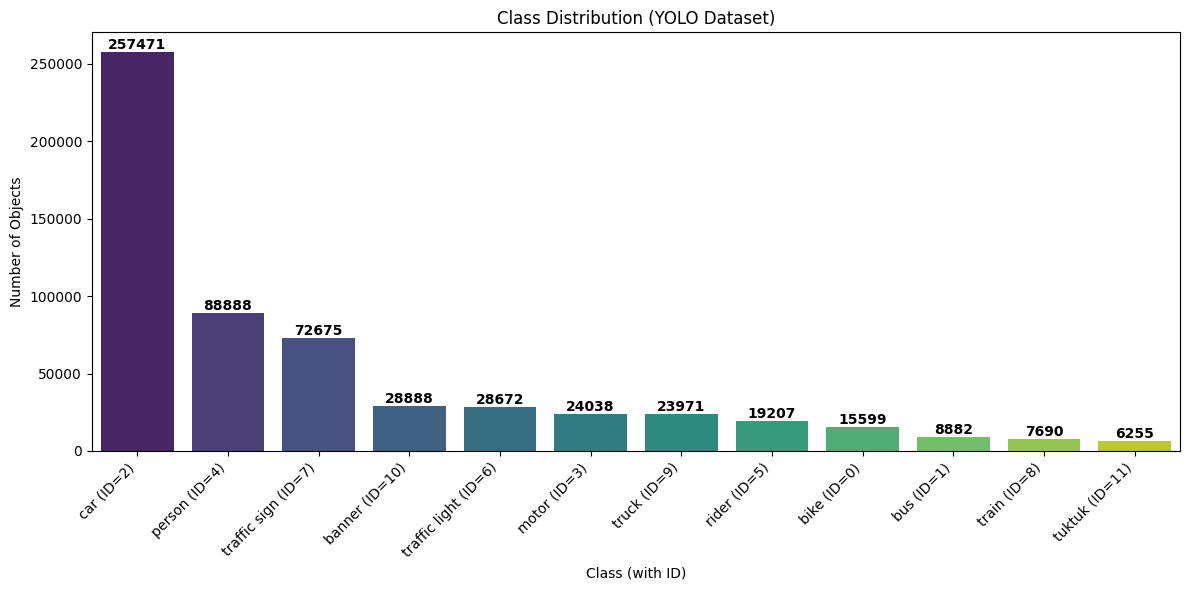

In [11]:
import os
import yaml
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Path to the folder containing YOLO label .txt files
labels_folder = r'D:\roboflow\merged-2\labels'

# 🧾 Path to the YAML file containing class names
yaml_path = r"D:\roboflow\data.yaml"

# 🧠 Load class names from the YAML file
with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

# Handle both dict and list formats for "names"
if isinstance(data["names"], dict):
    class_names = data["names"]
else:
    class_names = {i: name for i, name in enumerate(data["names"])}

# 🧮 Count class occurrences across all label files
class_counts = Counter()

for label_file in os.listdir(labels_folder):
    if label_file.endswith(".txt"):
        with open(os.path.join(labels_folder, label_file), "r") as f:
            for line in f:
                if line.strip():
                    class_id = int(line.split()[0])
                    class_counts[class_id] += 1

# 🏷️ Combine ID and class name for labeling
class_counts_named = {f"{class_names[cid]} (ID={cid})": count for cid, count in class_counts.items()}

print(class_counts_named)

# 📊 Plot the class distribution
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=list(class_counts_named.keys()),
    y=list(class_counts_named.values()),
    palette="viridis",
    order=sorted(class_counts_named, key=class_counts_named.get, reverse=True)
)

# ✏️ Add text labels above each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,     # center of the bar
        p.get_height(),                    # height (top of the bar)
        int(p.get_height()),               # label text (count)
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

plt.title("Class Distribution (YOLO Dataset)")
plt.xlabel("Class (with ID)")
plt.ylabel("Number of Objects")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Percentege Of Images Has Only Cars 

In [ ]:
import os

labels_dir = r'D:\roboflow\merged-2\labels'

car_cls_id = 2

total_images = 0
images_has_only_cars = 0
total_car_boxes_in_only_car_images = 0

for lbl_file in os.listdir(labels_dir):
  if lbl_file.endswith(".txt"):
    with open(os.path.join(labels_dir, lbl_file), 'r') as f:
      lines = [line.strip() for line in f.readlines() if line.strip()]

      if not lines:
        continue

      total_images += 1
      cls_ids = [int(line.split()[0]) for line in lines]
      num_bounding_box = [cls for cls in cls_ids if cls == car_cls_id]

      if all(cls == car_cls_id for cls in cls_ids):
        images_has_only_cars += 1
        total_car_boxes_in_only_car_images += len(cls_ids)

print(f"num of total images {total_images}")
print(f"num of images has only cars {images_has_only_cars}")
print(f"Total bounding boxes for 'only car' images: {total_car_boxes_in_only_car_images}")
print(f"percentege of images has only cars {(images_has_only_cars / total_images) * 100:.2f}%")

num of total images 107005
num of images has only cars 2932
Total bounding boxes for 'only car' images: 14731
percentege of images has only cars 2.74%


# Delete Images has only cars 

In [8]:
import os

labels_dir = r'D:\roboflow\merged-2\labels'
images_dir = r'D:\roboflow\merged-2\images'

car_cls_id = 2

total_images = 0
images_has_only_cars = 0
total_car_boxes_in_only_car_images = 0

only_car_files = []

for lbl_file in os.listdir(labels_dir):
  if lbl_file.endswith(".txt"):
    with open(os.path.join(labels_dir, lbl_file), 'r') as f:
      lines = [line.strip() for line in f.readlines() if line.strip()]

      if not lines:
        continue

      total_images += 1
      cls_ids = [int(line.split()[0]) for line in lines]
      num_bounding_box = [cls for cls in cls_ids if cls == car_cls_id]

      if all(cls == car_cls_id for cls in cls_ids):
        images_has_only_cars += 1
        total_car_boxes_in_only_car_images += len(cls_ids)
        only_car_files.append(lbl_file)

print(f"num of total images {total_images}")
print(f"num of images has only cars {images_has_only_cars}")
print(f"Total bounding boxes for 'only car' images: {total_car_boxes_in_only_car_images}")
print(f"percentege of images has only cars {(images_has_only_cars / total_images) * 100:.2f}%")

deleted_images = 0
deleted_labels = 0

for lbl_file in only_car_files:

  label_path = os.path.join(labels_dir, lbl_file)

  if os.path.exists(label_path):
    os.remove(label_path)
    deleted_labels += 1

    img_name = os.path.splitext(lbl_file)[0]

    for ext in ['.jpg', '.png', '.jpeg']:
      im_path = os.path.join(images_dir, img_name + ext)

      if os.path.exists(im_path):
        os.remove(im_path)
        deleted_images += 1
        break

print(f"\nDeleted {deleted_images} images and {deleted_labels} label files.")

num of total images 107005
num of images has only cars 2932
Total bounding boxes for 'only car' images: 14731
percentege of images has only cars 2.74%

Deleted 2932 images and 2932 label files.


# all are cars except exactly one other object

In [10]:
import os
from collections import Counter

# 📂 Path to YOLO label files
labels_dir = r'D:\roboflow\merged-2\labels'
images_dir = r'D:\roboflow\merged-2\images'


car_cls_id = 2  # Class ID for 'car'

total_images = 0
target_images = []       # List to store image names that meet the condition
total_boxes_in_target = 0  # Total bounding boxes in those images

for lbl_file in os.listdir(labels_dir):
    if lbl_file.endswith(".txt"):
        with open(os.path.join(labels_dir, lbl_file), 'r') as f:
            lines = [line.strip() for line in f.readlines() if line.strip()]

        # Skip empty label files
        if not lines:
            continue

        total_images += 1

        # Extract all class IDs in this image
        cls_ids = [int(line.split()[0]) for line in lines]

        # Count how many times each class appears
        counts = Counter(cls_ids)
        total = sum(counts.values())

        # Get the number of car objects (or 0 if not present)
        car_count = counts.get(car_cls_id, 0)
        others = total - car_count

        # ✅ Condition: all are cars except exactly one other object
        if others == 1 and car_count >= 1:
            target_images.append(lbl_file)
            total_boxes_in_target += total

# 🧾 Results
num_target_images = len(target_images)
percentage = (num_target_images / total_images * 100) if total_images > 0 else 0

print(f"📸 Total images: {total_images}")
print(f"🚗 Images with all cars except one other object: {num_target_images}")
print(f"📦 Total bounding boxes in those images: {total_boxes_in_target}")
print(f"📊 Percentage: {percentage:.2f}%")

deleted_images = 0
deleted_labels = 0

for lbl_file in target_images:

  label_path = os.path.join(labels_dir, lbl_file)

  if os.path.exists(label_path):
    os.remove(label_path)
    deleted_labels += 1

    img_name = os.path.splitext(lbl_file)[0]

    for ext in ['.jpg', '.png', '.jpeg']:
      im_path = os.path.join(images_dir, img_name + ext)

      if os.path.exists(im_path):
        os.remove(im_path)
        deleted_images += 1
        break

print(f"\nDeleted {deleted_images} images and {deleted_labels} label files.")

📸 Total images: 104073
🚗 Images with all cars except one other object: 10871
📦 Total bounding boxes in those images: 63796
📊 Percentage: 10.45%

Deleted 10871 images and 10871 label files.


# exactly one car, but total > 1 (means other objects exist)

In [1]:
import os
from collections import Counter

# 📂 Path to YOLO label files
labels_dir = r"D:\roboflow\train\labels"
car_cls_id = 2  # Class ID for 'car'

total_images = 0
target_images = []  # To store image names that match the condition

for lbl_file in os.listdir(labels_dir):
    if lbl_file.endswith(".txt"):
        with open(os.path.join(labels_dir, lbl_file), "r") as f:
            lines = [line.strip() for line in f.readlines() if line.strip()]

        # Skip empty label files
        if not lines:
            continue

        total_images += 1

        # Extract class IDs from lines
        cls_ids = [int(line.split()[0]) for line in lines]

        # Count occurrences of each class
        counts = Counter(cls_ids)
        car_count = counts.get(car_cls_id, 0)

        # ✅ Condition: exactly one car, but total > 1 (means other objects exist)
        if car_count == 1 and len(cls_ids) > 1:
            target_images.append(lbl_file)

# 🧾 Results
num_target_images = len(target_images)
percentage = (num_target_images / total_images * 100) if total_images else 0

print(f"📸 Total images: {total_images}")
print(f"🚗 Images with exactly one car and other objects: {num_target_images}")
print(f"📊 Percentage: {percentage:.2f}%")

📸 Total images: 79104
🚗 Images with exactly one car and other objects: 3707
📊 Percentage: 4.69%


In [20]:
# 💾 Optional: save names of those images
with open("one_car_images.txt", "w") as f:
    f.write("\n".join(target_images))
print("✅ Saved list to one_car_images.txt")

✅ Saved list to one_car_images.txt


In [4]:
import os
from collections import Counter
import shutil

# 📂 Paths
labels_dir = r'D:\roboflow\merged\labels'   # Folder containing YOLO label .txt files
images_dir = r'D:\roboflow\merged\images'   # Folder containing the corresponding images
output_dir = r'D:\roboflow\car_except_one'  # Folder to save selected images and labels
os.makedirs(output_dir, exist_ok=True)

car_cls_id = 2  # Class ID for 'car'

total_images = 0
target_images = []        # List to store label files that meet the condition
total_boxes_in_target = 0  # Total bounding boxes in those images

# 🧮 Loop through all label files
for lbl_file in os.listdir(labels_dir):
    if lbl_file.endswith(".txt"):
        with open(os.path.join(labels_dir, lbl_file), 'r') as f:
            lines = [line.strip() for line in f.readlines() if line.strip()]

        # Skip empty label files
        if not lines:
            continue

        total_images += 1

        # Extract all class IDs in this image
        cls_ids = [int(line.split()[0]) for line in lines]

        # Count how many times each class appears
        counts = Counter(cls_ids)
        total = sum(counts.values())

        # Get the number of car objects (or 0 if not present)
        car_count = counts.get(car_cls_id, 0)
        others = total - car_count

        # ✅ Condition: all are cars except exactly one other object
        if others == 1 and car_count >= 1:
            target_images.append(lbl_file)
            total_boxes_in_target += total

# 🧾 Results
num_target_images = len(target_images)
percentage = (num_target_images / total_images * 100) if total_images > 0 else 0

print(f"📸 Total images: {total_images}")
print(f"🚗 Images with all cars except one other object: {num_target_images}")
print(f"📦 Total bounding boxes in those images: {total_boxes_in_target}")
print(f"📊 Percentage: {percentage:.2f}%")

# 🖼️ Copy matching images and labels to new folder
copied_images = 0
copied_labels = 0

for lbl_file in target_images:
    label_src = os.path.join(labels_dir, lbl_file)
    label_dst = os.path.join(output_dir, lbl_file)

    # Copy label file
    shutil.copy(label_src, label_dst)
    copied_labels += 1

    # Copy image file
    image_name = os.path.splitext(lbl_file)[0]
    found = False
    for ext in ['.jpg', '.png', '.jpeg']:
        image_path = os.path.join(images_dir, image_name + ext)
        if os.path.exists(image_path):
            shutil.copy(image_path, os.path.join(output_dir, image_name + ext))
            copied_images += 1
            found = True
            break

    if not found:
        print(f"⚠️ Image not found for {lbl_file}")

print(f"\n✅ Copied {copied_images} images and {copied_labels} label files to: {output_dir}")

📸 Total images: 85473
🚗 Images with all cars except one other object: 866
📦 Total bounding boxes in those images: 5866
📊 Percentage: 1.01%

✅ Copied 866 images and 866 label files to: D:\roboflow\car_except_one


# total image without car and apply ogmantion 

In [8]:
import os

labels_dir = r'D:\roboflow\merged-2\labels'
images_dir = r'D:\roboflow\merged-2\images'

car_cls_id = 2

total_images = 0
images_with_no_car = 0
total_car_boxes_in_only_car_images = 0

no_car_images = []

for lbl_file in os.listdir(labels_dir):
  if lbl_file.endswith(".txt"):
    with open(os.path.join(labels_dir, lbl_file), 'r') as f:
      lines = [line.strip() for line in f.readlines() if line.strip()]

      if not lines:
        continue

      total_images += 1
      cls_ids = [int(line.split()[0]) for line in lines]
      num_bounding_box = [cls for cls in cls_ids if cls == car_cls_id]

      if car_cls_id not in cls_ids:
        images_with_no_car += 1
        # total_car_boxes_in_only_car_images += len(cls_ids)
        no_car_images.append(lbl_file)

print(f"num of total images {total_images}")
print(f"num of images with no cars {images_with_no_car}")
print(f"percentege of images with no cars {(images_with_no_car / total_images) * 100:.2f}%")

num of total images 70196
num of images with no cars 3719
percentege of images with no cars 5.30%


In [13]:
import os
import shutil

# 📂 Paths
labels_dir = r'D:\roboflow\merged\labels'
images_dir = r'D:\roboflow\merged\images'

# 📁 Output folders for images with no cars
output_images_dir = r'D:\roboflow\no_car_images\images'
output_labels_dir = r'D:\roboflow\no_car_images\labels'

# ✅ Create output folders if they don’t exist
os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_labels_dir, exist_ok=True)

# 🚗 Car class ID
car_cls_id = 2

total_images = 0
images_with_no_car = 0
no_car_images = []

for lbl_file in os.listdir(labels_dir):
    if lbl_file.endswith(".txt"):
        with open(os.path.join(labels_dir, lbl_file), 'r') as f:
            lines = [line.strip() for line in f.readlines() if line.strip()]

        if not lines:
            continue

        total_images += 1
        cls_ids = [int(line.split()[0]) for line in lines]

        # ✅ Check if this image has NO cars
        if car_cls_id not in cls_ids:
            images_with_no_car += 1
            no_car_images.append(lbl_file)

            # 🏷 Copy label
            label_src = os.path.join(labels_dir, lbl_file)
            label_dst = os.path.join(output_labels_dir, lbl_file)
            shutil.copy2(label_src, label_dst)

            # 🖼 Copy image (try multiple extensions)
            image_name = os.path.splitext(lbl_file)[0]
            found = False
            for ext in [".jpg", ".jpeg", ".png"]:
                img_src = os.path.join(images_dir, image_name + ext)
                if os.path.exists(img_src):
                    img_dst = os.path.join(output_images_dir, image_name + ext)
                    shutil.copy2(img_src, img_dst)
                    found = True
                    break

            if not found:
                print(f"⚠️ Image not found for {lbl_file}")

print("\n====================== RESULTS ======================")
print(f"📸 Total labeled images: {total_images}")
print(f"🚫 Images with no cars: {images_with_no_car}")
print(f"📦 Copied images + labels to:")
print(f"   🖼 {output_images_dir}")
print(f"   🏷 {output_labels_dir}")
print("=====================================================")


====================== RESULTS ======================
📸 Total labeled images: 59456
🚫 Images with no cars: 6037
📦 Copied images + labels to:
   🖼 D:\roboflow\no_car_images\images
   🏷 D:\roboflow\no_car_images\labels


# Compare between data sets with bdd100k and remove duplicated from bdd

In [13]:
import os
from PIL import Image
import imagehash
import shutil

# 📂 Paths
folder1 = r"D:\images_with_no_car.v2i.yolov8\train\images"
folder2 = r"D:\roboflow\merged-2\images"
labels_dir = r"D:\roboflow\merged\labels"

# 📦 Backup folder for duplicates (for safety)
backup_dir = r"D:\duplicates_backup"
os.makedirs(backup_dir, exist_ok=True)
os.makedirs(os.path.join(backup_dir, "images"), exist_ok=True)
os.makedirs(os.path.join(backup_dir, "labels"), exist_ok=True)

# 🧠 Function to compute image hash safely
def get_image_hash(image_path):
    try:
        with Image.open(image_path) as img:
            return imagehash.average_hash(img)  # You can also use phash() or dhash()
    except Exception as e:
        print(f"⚠️ Error reading {image_path}: {e}")
        return None

# 📦 Collect all hashes for folder1
hashes1 = {}
for f in os.listdir(folder1):
    if f.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(folder1, f)
        h = get_image_hash(path)
        if h:
            hashes1[h] = f

# 📦 Compare with folder2 and move duplicates
duplicates = []
moved_duplicates = 0
moved_files_log = []

for f in os.listdir(folder2):
    if f.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(folder2, f)
        h = get_image_hash(img_path)
        if h in hashes1:
            duplicates.append((hashes1[h], f))  # (image from folder1, image from folder2)
            try:
                # Move image to backup folder instead of deleting
                shutil.move(img_path, os.path.join(backup_dir, "images", f))

                # Move label if exists
                label_name = os.path.splitext(f)[0] + ".txt"
                label_path = os.path.join(labels_dir, label_name)
                if os.path.exists(label_path):
                    shutil.move(label_path, os.path.join(backup_dir, "labels", label_name))

                moved_duplicates += 1
                moved_files_log.append(f)
                print(f"🟡 Moved duplicate: {f}")

            except Exception as e:
                print(f"❌ Error moving {f}: {e}")

# 💾 Save moved file names to log
log_path = r"D:\moved_duplicates_log.txt"
with open(log_path, "w") as log_file:
    log_file.write("\n".join(moved_files_log))

# 📊 Results
print("\n====================== RESULTS ======================")
print(f"🧩 Total images in folder1: {len(hashes1)}")
print(f"🧩 Total images checked in folder2: {len(os.listdir(folder2))}")
print(f"⚠️ Exact duplicate images found: {len(duplicates)}")
print(f"✅ Moved {moved_duplicates} duplicate images + labels to backup folder")
print(f"📝 Log saved at: {log_path}")
print(f"📦 Backup folder: {backup_dir}")
print("=====================================================")

🟡 Moved duplicate: 0024b742-83709bd4_jpg.rf.6e94414ae6ad1b7daa0119ae168553cf.jpg
🟡 Moved duplicate: 00268999-9f6d5823_jpg.rf.4c1e435e69881ecf60356964719c107a.jpg
🟡 Moved duplicate: 00779058-517a4591_jpg.rf.cd487951fd06d7d4bc103ef56c760c9e.jpg
🟡 Moved duplicate: 007ae77f-79995643_jpg.rf.8698b24c09416f14bae768613c5ad94f.jpg
🟡 Moved duplicate: 009215e2-d6d2d61b_jpg.rf.24c19a1bb5941c3068aa82756a26a8fc.jpg
🟡 Moved duplicate: 009215e2-ea063b28_jpg.rf.17910cb5cbfcdb3d8da89dcee9446007.jpg
🟡 Moved duplicate: 0096f810-6bcc27da_jpg.rf.4c3474e839f5a65a97fdf23a91009e0e.jpg
🟡 Moved duplicate: 00ac3256-0f8e2cda_jpg.rf.f1b9a00f70f949541713352d6f60033b.jpg
🟡 Moved duplicate: 00b4c5fc-8fcf3628_jpg.rf.166941a8218adbe976e0f89efa768346.jpg
🟡 Moved duplicate: 00e5e793-22614772_jpg.rf.ebf8e77f19f264a4c210a4da609f2749.jpg
🟡 Moved duplicate: 00ffeef4-75f6b5ec_jpg.rf.119438d65d0754f8b6037cbf7727c6e7.jpg
🟡 Moved duplicate: 00ffeef4-b105ce4d_jpg.rf.0c206dcabf71fe0b7c7aa36ec8a1a5d5.jpg
🟡 Moved duplicate: 0102614a-

In [11]:
import os
from PIL import Image
import imagehash

# 📂 Paths
folder1 = r"D:\images_with_no_car.v2i.yolov8\train\images"
folder2 = r"D:\roboflow\merged-2\images"

# 🧠 Function to compute image hash safely
def get_image_hash(image_path):
    try:
        with Image.open(image_path) as img:
            return imagehash.average_hash(img)
    except Exception as e:
        print(f"⚠️ Error reading {image_path}: {e}")
        return None

# 📦 Collect all hashes for folder1 (reference)
hashes1 = {}
for f in os.listdir(folder1):
    if f.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(folder1, f)
        h = get_image_hash(path)
        if h:
            hashes1[h] = f

# 📊 Check duplicates from folder2
duplicates = []

for f in os.listdir(folder2):
    if f.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(folder2, f)
        h = get_image_hash(img_path)
        if h in hashes1:
            duplicates.append((hashes1[h], f))  # (original, duplicate)
            print(f"🔁 Duplicate found: {f}  matches → {hashes1[h]}")

# 📊 Results
print("\n====================== RESULTS ======================")
print(f"📁 Total images in folder1: {len(hashes1)}")
print(f"📁 Total images checked in folder2: {len(os.listdir(folder2))}")
print(f"🔁 Total duplicates found: {len(duplicates)}")
print("=====================================================")

🔁 Duplicate found: 0024b742-83709bd4_jpg.rf.6e94414ae6ad1b7daa0119ae168553cf.jpg  matches → 4ecc7f15676acc0529738de8210a8264_jpg.rf.b5e4800671d096414c8542f692c84f4f.jpg
🔁 Duplicate found: 00268999-9f6d5823_jpg.rf.4c1e435e69881ecf60356964719c107a.jpg  matches → 00268999-9f6d5823_jpg.rf.dac737dc5960a96a74f1813ad662c812.jpg
🔁 Duplicate found: 00779058-517a4591_jpg.rf.cd487951fd06d7d4bc103ef56c760c9e.jpg  matches → 00779058-517a4591_jpg.rf.661ad122c6364a95a0de2359c2a7ef2b.jpg
🔁 Duplicate found: 007ae77f-79995643_jpg.rf.8698b24c09416f14bae768613c5ad94f.jpg  matches → 007ae77f-79995643_jpg.rf.b37ac9d1cdcb4d2feb9e2681e5ee3624.jpg
🔁 Duplicate found: 009215e2-d6d2d61b_jpg.rf.24c19a1bb5941c3068aa82756a26a8fc.jpg  matches → 009215e2-d6d2d61b_jpg.rf.40aae4e260a09f324a2c8839496c3a07.jpg
🔁 Duplicate found: 009215e2-ea063b28_jpg.rf.17910cb5cbfcdb3d8da89dcee9446007.jpg  matches → 009215e2-ea063b28_jpg.rf.e5196083d3c1405091dc5534e5ddeed9.jpg
🔁 Duplicate found: 0096f810-6bcc27da_jpg.rf.4c3474e839f5a65a9